# Task 1 – On the use of distance information for UwaveGesture Recognition Task

In [2]:
# Required libraries
library(ggplot2)
library(class)
library(data.table)
library(tidyverse)
library(directlabels)
library(reshape)
library(glmnet)
library(FastKNN)
library(penalized)
library(tidyr) 
library(dplyr)
library(caret)
library(TunePareto) 
library(e1071)

In [3]:
# Reading x, y and z datas for test and train part
# Train part
x_train = read.table("uWaveGestureLibrary_X_TRAIN")
y_train = read.table("uWaveGestureLibrary_Y_TRAIN")
z_train = read.table("uWaveGestureLibrary_Z_TRAIN")
# Test part
x_test = read.table("uWaveGestureLibrary_X_TEST")
y_test = read.table("uWaveGestureLibrary_Y_TEST")
z_test = read.table("uWaveGestureLibrary_Z_TEST")

In [4]:
# Rearrangement of column name for test and train part
cn <- function(letter, length){ lst <- rep(1,length)
for(i in 1:length){c <- paste(letter, toString(i))
lst[i] <- c}
return(lst)}

# Train part
xc <- cn("X",dim(x_train)[2]-1)
colnames(x_train)[2:316] = make.names(xc, unique=TRUE) 
colnames(x_train)[1] = "class"
yc <- cn("Y",dim(y_train)[2])
colnames(y_train) = make.names(yc, unique=TRUE)
y_train = y_train [,-1]
zc <- cn("Z",dim(z_train)[2])
colnames(z_train)= make.names(zc, unique=TRUE)
z_train = z_train [,-1]

# Test part
x_c <- cn("X",dim(x_test)[2]-1)
colnames(x_test)[2:316] = make.names(x_c, unique=TRUE)
colnames(x_test)[1] = "class"
y_c <- cn("Y",dim(y_test)[2])
colnames(y_test) = make.names(y_c, unique=TRUE)
y_test = y_test [,-1]
z_c <- cn("Z",dim(z_test)[2])
colnames(z_test) = make.names(z_c, unique=TRUE)
z_test = z_test [,-1]

In [14]:
# Binding step for test and train part
# Train part
train = cbind(x_train, y_train, z_train) 
train_c <- cbind(x_train[,-1], y_train, z_train)
# Test part
test = cbind(x_test, y_test, z_test)
test_c <- cbind(x_test[,-1], y_test, z_test)

In [6]:
head(train)

class,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,...,Z.307,Z.308,Z.309,Z.310,Z.311,Z.312,Z.313,Z.314,Z.315,Z.316
6,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,...,0.5232168,0.5139944,0.50348075,0.49296714,0.47452222,0.4560773,0.4376324,0.4191875,0.4007426,0.3822976
5,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,...,-0.4270104,-0.4270104,-0.42701043,-0.42717222,-0.42877307,-0.4407199,-0.4526667,-0.4646135,-0.4765603,-0.4885071
5,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,...,-0.8627172,-0.8627172,-0.86271720,-0.86271720,-0.86271720,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172
3,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,...,-0.1873845,-0.1235489,-0.05587047,0.01180812,0.07948656,0.1570561,0.2537396,0.4455027,0.6485381,0.8515735
4,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,...,1.8674725,1.8343190,1.75599960,1.63858220,1.52116390,1.4532661,1.5152189,1.6326367,1.7500543,1.8674725
8,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,...,0.6979770,0.6654623,0.63294758,0.60043289,0.55859021,0.5167475,0.4679755,0.4192035,0.3704314,0.3216594


In [15]:
head(train_c)

X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,...,Z.307,Z.308,Z.309,Z.310,Z.311,Z.312,Z.313,Z.314,Z.315,Z.316
-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,...,0.5232168,0.5139944,0.50348075,0.49296714,0.47452222,0.4560773,0.4376324,0.4191875,0.4007426,0.3822976
1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,...,-0.4270104,-0.4270104,-0.42701043,-0.42717222,-0.42877307,-0.4407199,-0.4526667,-0.4646135,-0.4765603,-0.4885071
0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,...,-0.8627172,-0.8627172,-0.86271720,-0.86271720,-0.86271720,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172
0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,...,-0.1873845,-0.1235489,-0.05587047,0.01180812,0.07948656,0.1570561,0.2537396,0.4455027,0.6485381,0.8515735
1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,...,1.8674725,1.8343190,1.75599960,1.63858220,1.52116390,1.4532661,1.5152189,1.6326367,1.7500543,1.8674725
-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,...,0.6979770,0.6654623,0.63294758,0.60043289,0.55859021,0.5167475,0.4679755,0.4192035,0.3704314,0.3216594


In [7]:
head(test)

class,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,...,Z.307,Z.308,Z.309,Z.310,Z.311,Z.312,Z.313,Z.314,Z.315,Z.316
5,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,...,-0.3484232,-0.3484232,-0.3446754,-0.3407276,-0.3331472,-0.3254234,-0.3176995,-0.3099757,-0.30225190,-0.29452808
1,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,...,0.9613500,0.8491418,0.7255457,0.5892767,0.5390750,0.5158101,0.5158101,0.5158101,0.51581006,0.51581006
4,1.50901170,1.52629600,1.54358030,1.56086460,1.57381090,1.57691320,1.57859210,1.57859210,1.57859210,...,-0.5659620,-0.4756798,-0.3990893,-0.3440736,-0.2890578,-0.2340421,-0.1790264,-0.1240107,-0.06899497,-0.01397925
4,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,...,1.0449500,1.0449500,1.0449500,1.0449500,1.0793386,1.1150846,1.1710012,1.2274418,1.28388270,1.34032360
5,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,...,-0.6934601,-0.6897651,-0.6860701,-0.6823750,-0.6786800,-0.6749850,-0.6712899,-0.6675949,-0.66389985,-0.66020482
4,1.01157350,1.08170540,1.15183720,1.22138950,1.28030020,1.30519210,1.30519210,1.30519210,1.30519210,...,1.5889660,1.5889660,1.5889660,1.5889660,1.5889660,1.5025310,1.2979683,1.0564539,0.81292720,0.56940054


In [16]:
head(test_c)

X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,...,Z.307,Z.308,Z.309,Z.310,Z.311,Z.312,Z.313,Z.314,Z.315,Z.316
1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,...,-0.3484232,-0.3484232,-0.3446754,-0.3407276,-0.3331472,-0.3254234,-0.3176995,-0.3099757,-0.30225190,-0.29452808
-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,...,0.9613500,0.8491418,0.7255457,0.5892767,0.5390750,0.5158101,0.5158101,0.5158101,0.51581006,0.51581006
1.50901170,1.52629600,1.54358030,1.56086460,1.57381090,1.57691320,1.57859210,1.57859210,1.57859210,1.57859210,...,-0.5659620,-0.4756798,-0.3990893,-0.3440736,-0.2890578,-0.2340421,-0.1790264,-0.1240107,-0.06899497,-0.01397925
1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,...,1.0449500,1.0449500,1.0449500,1.0449500,1.0793386,1.1150846,1.1710012,1.2274418,1.28388270,1.34032360
1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,...,-0.6934601,-0.6897651,-0.6860701,-0.6823750,-0.6786800,-0.6749850,-0.6712899,-0.6675949,-0.66389985,-0.66020482
1.01157350,1.08170540,1.15183720,1.22138950,1.28030020,1.30519210,1.30519210,1.30519210,1.30519210,1.30519210,...,1.5889660,1.5889660,1.5889660,1.5889660,1.5889660,1.5025310,1.2979683,1.0564539,0.81292720,0.56940054


a) Suppose we decided to apply a nearest-neighbor (NN) classifier to find the labels of test instances. You can use the strategy you employed when you apply PCA to this data in Homework 2 (i.e. concatenation of the axes). Propose two distance measures for computing similarity between two time series. The distance calculation on the concatenated time series implicitly weights the distances of each axis in an equal way. For each distance measure alternative, use the training data to identify the ideal value of k which minimizes the error of a 10-fold cross-validation.

In [23]:
# Using knn model for euclidean distance [1 repeatation, 10-fold cross validation, 10 different k values (1, 3, 5, 7, 9, 11, 13, 15, 17, 19)]
set.seed(5) # selected number
nf <- 10 # 10-fold for cv
nr <- 1
k <- c(1, 3, 5, 7, 9, 11, 13, 15, 17, 19) # k values vector
gap <- expand.grid(k = k)
control <- trainControl(method = "cv", number = nf)
knn_fit_euc <- train(as.factor(class) ~ ., method  = "knn", data = train, tuneGrid = gap, trControl  = control)
print(knn_fit_euc)

k-Nearest Neighbors 

896 samples
945 predictors
  8 classes: '1', '2', '3', '4', '5', '6', '7', '8' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 807, 808, 807, 807, 806, 807, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9443277  0.9363029
   3  0.9442774  0.9362240
   5  0.9375728  0.9285559
   7  0.9364739  0.9272942
   9  0.9287205  0.9184075
  11  0.9298316  0.9196802
  13  0.9220286  0.9107270
  15  0.9209297  0.9094659
  17  0.9208925  0.9094221
  19  0.9130515  0.9004307

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 1.


Commend for Task1a_euclidean distance: 10 different k values were tested. Even if k=1 and k=3 have almost the same accuracy values, the model with 1 nearest neighbor, that is more minimizes the error of a 10-fold cross-validation for the Euclidean distance, is the best with 0.9443 accuracy value.

In [18]:
# Using knn model for manhattan distance [1 repeatation, 10-fold cross validation, 10 different k values (1, 3, 5, 7, 9, 11, 13, 15, 17, 19)]
set.seed(6) # selected number
nf <- 10 # 10-fold for cv
nr <- 1 # repeatation number
kk <- c(1, 3, 5, 7, 9, 11, 13, 15, 17, 19) # k values vector
gap <- expand.grid(k = kk)
cross_validation_indices_man <- generateCVRuns(train$class, 
                                               nfold = nf, 
                                               ntimes = 1, 
                                               leaveOneOut = FALSE, 
                                               stratified = TRUE)
cross_validation_outputs_man <- data.table()
dm_man <- as.matrix(dist(train_c, method = "manhattan"))
# Repeatation > 10-folds > 10 different k values
# Repeatation
for(a in 1:nr){repeatation <- cross_validation_indices_man[[a]]               
# 10-folds    
for(b in 1:nf){indices_test <- repeatation[[b]] 
cross_validation_train <- train[-indices_test,]
cross_validation_test <- train[indices_test,]
l <- rownames(as.data.table(cross_validation_train)) %>% as.numeric              
# for 10 different k values    
for(c in 1:length(kk)){kkk <- kk[c]
knn_man_prd <- knn_test_function(cross_validation_train, 
                                 cross_validation_test, 
                                 dm_man[indices_test,l], 
                                 train$class, 
                                 k = kkk)                      
# Cross-validation part for manhattan dis.
cross_validation_outputs_man <-rbind(cross_validation_outputs_man, 
                                           data.table(Replication = a, 
                                                      Fold = b, 
                                                      List_of_K = kkk, 
                                                      TestId = indices_test, Predictions = as.character(knn_man_prd) %>% as.numeric, True = train[indices_test, 1]))}}}

In [19]:
# Accuracy values of manhattan distance measure with 10 different k values
cross_validation_outputs_man[ , list(Values_of_Accuracy = mean(Predictions == True)), by = list(List_of_K)]

List_of_K,Values_of_Accuracy
1,0.9564732
3,0.9542411
5,0.9542411
7,0.9464286
9,0.9386161
11,0.9308036
13,0.9296875
15,0.9274554
17,0.9263393
19,0.9241071


Commend for Task1a_manhattan distance: 10 different k values were tested. Even if k=1, k=3 and k=5 have almost the same accuracy values, the model with 1 nearest neighbor, that is more minimizes the error of a 10-fold cross-validation for the Euclidean distance, is the best with 0.956 accuracy value.

b) Using the value of k (identified for each distance measure) in part (a) and evaluate your final performance on the test data and present your results in a (8-by-8) confusion matrix, showing the counts for actual and predicted labels. In addition, quote the runtime and accuracy for your results.

In [24]:
# Confusion matrix for euclidean distance with the best k = 1
predictions <- knn(train_c, test_c, train$class , k = 1)
table(predictions, test$class)

           
predictions   1   2   3   4   5   6   7   8
          1 429   1   2   6   3   6   0   0
          2   0 451   0   0   0   0   0   0
          3   0   0 417   0  10   6   3   0
          4   2   0   1 379   3  12   0   4
          5   0   0  15  49 415  17   0   2
          6   5   0  15  11   2 407   0   0
          7   1   0   4   0   0   0 444   0
          8   0   0   0   5   0   1   0 454

In [26]:
# Runtime for results with the best k = 1 for euclidean distance
first_time <- Sys.time()
predictions = knn(train_c, test_c, train$class, k = 1)
last_time <- Sys.time()
runtime_euclidean <- last_time - first_time
runtime_euclidean

Time difference of 1.048822 mins

In [27]:
# Accuracy for euclidean distance with the best k = 1
Accuracy_euclidean <- mean(predictions == test$class)
Accuracy_euclidean

[1] 0.9480737

In [28]:
# Confusion matrix for manhattan distance with the best k = 1
dm_man <- Distance_for_KNN_test(test_c, train_c)
prediction = knn_test_function(train_c, test_c, dm_man, train$class, k = 1)
table(prediction, test$class)

          
prediction   1   2   3   4   5   6   7   8
         1 427   1   1   3   2   7   0   0
         2   0 449   0   0   0   0   0   0
         3   0   0 398   0   6  17   3   0
         4   4   0   0 375   7  16   1   2
         5   0   0  22  54 416  30   0   3
         6   6   0  25  11   2 378   0   0
         7   0   2   8   1   0   1 443   0
         8   0   0   0   6   0   0   0 455

In [29]:
# Runtime for results with the best k = 1 for manhattan distance
first_time <- Sys.time()
dm_man <- Distance_for_KNN_test(test_c, train_c)
prediction = knn_test_function(train_c, test_c, dm_man, train$class, k = 1)
last_time <- Sys.time()
runtime_manhattan = last_time - first_time
runtime_manhattan

Time difference of 4.432469 mins

In [30]:
# Accuracy for manhattan distance with the best k = 1
Accuracy_manhattan <- mean(prediction == test$class)
Accuracy_manhattan

[1] 0.9327192

c) The observations from different axes are weighted equally if we compute the distance over each axis and sum them to obtain a final similarity measure. Is this reasonable? For example, we can compute the distance as below: 

                                "FinalDist = (W1)*Dist_x, + (W2)*Dist_y + (W3)*Dist_z"

where DistX is the distance based on the acceleration only on X axis, DistY is for Y axis and so on. Do you think weighting the distances over different axes to obtain a final similarity measure makes sense for classification? Why?

Answer of Task 1c) If we run distance in line with the equation that is "FinalDist = (W1)*Dist_x, + (W2)*Dist_y + (W3)*Dist_z", it can change the accuracy value of the model. This can be acceptable if one of the distance effect has higher sense than the other and it can also explain why we see the gestures on the x and y axes rather than the z axes with the information of acceleration. This issue can be solved by weighted distance point of view.

# Task 2 – Linear models on alternative representations of the data

a) Train a logistic regression model on the training data and use the model to make a prediction on the test data. Note that you will obtain probabilistic predictions (i.e. probability of a time series being from Class 3 if you encoded Class 3 as 1 in binary classification setting). This will require you to select a threshold since 0.5 as a threshold may not work well under this imbalanced class setting. To make things easier, use the ratio of Class 3 instances in the training data as threshold. Use the learned model to predict the class for test data. Present your results in a (2-by-2) confusion matrix.

In [32]:
# Calling class and getting class3 for train part
train_data <- train
train_data$class <- as.numeric(train_data$class==3)
train_data_c <- train_data[, -1]
# Calling class and getting class3 for test part
test_data <- test
test_data$class <- as.numeric(test_data$class==3)
test_data_c <- test_data[, -1]

In [99]:
head(train_data)

class,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,...,Z.307,Z.308,Z.309,Z.310,Z.311,Z.312,Z.313,Z.314,Z.315,Z.316
0,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,...,0.5232168,0.5139944,0.50348075,0.49296714,0.47452222,0.4560773,0.4376324,0.4191875,0.4007426,0.3822976
0,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,...,-0.4270104,-0.4270104,-0.42701043,-0.42717222,-0.42877307,-0.4407199,-0.4526667,-0.4646135,-0.4765603,-0.4885071
0,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,...,-0.8627172,-0.8627172,-0.86271720,-0.86271720,-0.86271720,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172
1,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,...,-0.1873845,-0.1235489,-0.05587047,0.01180812,0.07948656,0.1570561,0.2537396,0.4455027,0.6485381,0.8515735
0,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,...,1.8674725,1.8343190,1.75599960,1.63858220,1.52116390,1.4532661,1.5152189,1.6326367,1.7500543,1.8674725
0,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,...,0.6979770,0.6654623,0.63294758,0.60043289,0.55859021,0.5167475,0.4679755,0.4192035,0.3704314,0.3216594


In [33]:
head(train_data_c)

X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,...,Z.307,Z.308,Z.309,Z.310,Z.311,Z.312,Z.313,Z.314,Z.315,Z.316
-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,...,0.5232168,0.5139944,0.50348075,0.49296714,0.47452222,0.4560773,0.4376324,0.4191875,0.4007426,0.3822976
1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,...,-0.4270104,-0.4270104,-0.42701043,-0.42717222,-0.42877307,-0.4407199,-0.4526667,-0.4646135,-0.4765603,-0.4885071
0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,...,-0.8627172,-0.8627172,-0.86271720,-0.86271720,-0.86271720,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172
0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,...,-0.1873845,-0.1235489,-0.05587047,0.01180812,0.07948656,0.1570561,0.2537396,0.4455027,0.6485381,0.8515735
1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,...,1.8674725,1.8343190,1.75599960,1.63858220,1.52116390,1.4532661,1.5152189,1.6326367,1.7500543,1.8674725
-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,...,0.6979770,0.6654623,0.63294758,0.60043289,0.55859021,0.5167475,0.4679755,0.4192035,0.3704314,0.3216594


In [100]:
head(test_data)

class,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,...,Z.307,Z.308,Z.309,Z.310,Z.311,Z.312,Z.313,Z.314,Z.315,Z.316
0,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,...,-0.3484232,-0.3484232,-0.3446754,-0.3407276,-0.3331472,-0.3254234,-0.3176995,-0.3099757,-0.30225190,-0.29452808
0,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,...,0.9613500,0.8491418,0.7255457,0.5892767,0.5390750,0.5158101,0.5158101,0.5158101,0.51581006,0.51581006
0,1.50901170,1.52629600,1.54358030,1.56086460,1.57381090,1.57691320,1.57859210,1.57859210,1.57859210,...,-0.5659620,-0.4756798,-0.3990893,-0.3440736,-0.2890578,-0.2340421,-0.1790264,-0.1240107,-0.06899497,-0.01397925
0,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,...,1.0449500,1.0449500,1.0449500,1.0449500,1.0793386,1.1150846,1.1710012,1.2274418,1.28388270,1.34032360
0,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,...,-0.6934601,-0.6897651,-0.6860701,-0.6823750,-0.6786800,-0.6749850,-0.6712899,-0.6675949,-0.66389985,-0.66020482
0,1.01157350,1.08170540,1.15183720,1.22138950,1.28030020,1.30519210,1.30519210,1.30519210,1.30519210,...,1.5889660,1.5889660,1.5889660,1.5889660,1.5889660,1.5025310,1.2979683,1.0564539,0.81292720,0.56940054


In [34]:
head(test_data_c)

X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,...,Z.307,Z.308,Z.309,Z.310,Z.311,Z.312,Z.313,Z.314,Z.315,Z.316
1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,...,-0.3484232,-0.3484232,-0.3446754,-0.3407276,-0.3331472,-0.3254234,-0.3176995,-0.3099757,-0.30225190,-0.29452808
-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,...,0.9613500,0.8491418,0.7255457,0.5892767,0.5390750,0.5158101,0.5158101,0.5158101,0.51581006,0.51581006
1.50901170,1.52629600,1.54358030,1.56086460,1.57381090,1.57691320,1.57859210,1.57859210,1.57859210,1.57859210,...,-0.5659620,-0.4756798,-0.3990893,-0.3440736,-0.2890578,-0.2340421,-0.1790264,-0.1240107,-0.06899497,-0.01397925
1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,...,1.0449500,1.0449500,1.0449500,1.0449500,1.0793386,1.1150846,1.1710012,1.2274418,1.28388270,1.34032360
1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,...,-0.6934601,-0.6897651,-0.6860701,-0.6823750,-0.6786800,-0.6749850,-0.6712899,-0.6675949,-0.66389985,-0.66020482
1.01157350,1.08170540,1.15183720,1.22138950,1.28030020,1.30519210,1.30519210,1.30519210,1.30519210,1.30519210,...,1.5889660,1.5889660,1.5889660,1.5889660,1.5889660,1.5025310,1.2979683,1.0564539,0.81292720,0.56940054


In [36]:
# Using the ratio of Class 3 instances in the training data as threshold 
# Calculation of threshold
threshold <- sum(train_data$class)/length(train_data$class)
threshold

[1] 0.1183036

In [37]:
# Application of penalized regression (lambda = 0, binomial) - (logistic regression = LR)
# LR model on train data
set.seed(10)
Log_reg_1 <- glmnet(train_data_c, train_data$class, lambda = 0, family = 'binomial')
# Prediction & Accuracy on test data
Pred_1 <-as.numeric(predict.glmnet(Log_reg_1, as.matrix(test_data_c)) >= threshold)
True_1 <- test_data$class 

In [38]:
# Confusion matrix (2-by-2) for first LR model
table(Pred_1, True_1)

      True_1
Pred_1    0    1
     0 2939  179
     1  189  275

In [39]:
# Accuracy of first LR model predictions
Accuracy_1 <- mean(Pred_1 == True_1)
Accuracy_1

[1] 0.8972641

b) Use 10-fold cross-validation to determine your ideal lambda level based on binomial deviance (Note that we have used accuracy as primary metric to determine the lambda in class, however this strategy may not work well for the imbalanced data). Once you determine your best lambda value using 10-fold cross-validation, perform classification on test data similar to part a and compare your results. Comment on the regression coefficients. Is there any interesting information? Try to interpret the model.

In [40]:
# Cross-validation for determinig the best lambda value & LR model with lasso penalization
set.seed(11) # selected starting value
nf <- 10 # 10-fold for cv
cross_validation_outputs <- cv.glmnet(as.matrix(train_data_c), train_data$class, nfolds = nf, family = 'binomial')
Log_reg_2 <- glmnet(train_data_c, train_data$class, lambda = cross_validation_outputs$lambda.min, family = 'binomial')
Pred_2 <-as.numeric(predict.glmnet(Log_reg_2, as.matrix(test_data_c)) >= threshold)

In [41]:
# Confusion matrix (2-by-2) for second LR model
True_1 <- test_data$class
table(Pred_2, True_1)

      True_1
Pred_2    0    1
     0 3050  127
     1   78  327

In [42]:
# Accuracy of Second LR model predictions
Accuracy_2 <- mean(Pred_2 == True_1)
Accuracy_2

[1] 0.9427694

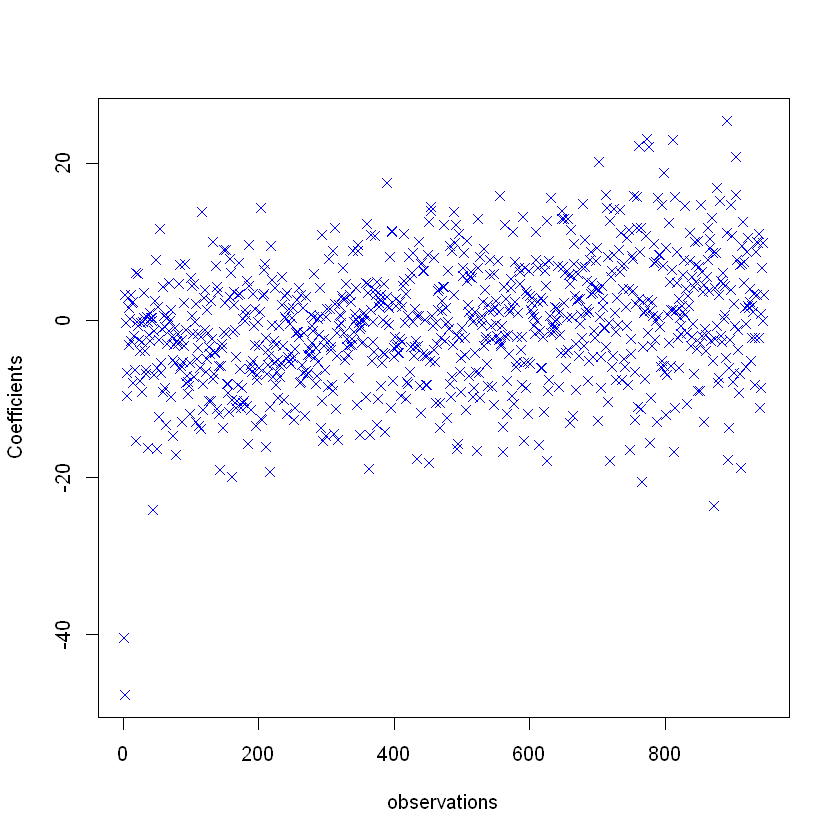

In [43]:
# Representation of coefficients of LR having zero lamda model
# x and y values
x <- 1:length(coefficients(Log_reg_1))
y <- (coefficients(Log_reg_1))
# Plotting of coeff.
plot(x, y, type = "p", pch = 4, col = "blue", xlab = "observations", ylab = "Coefficients")

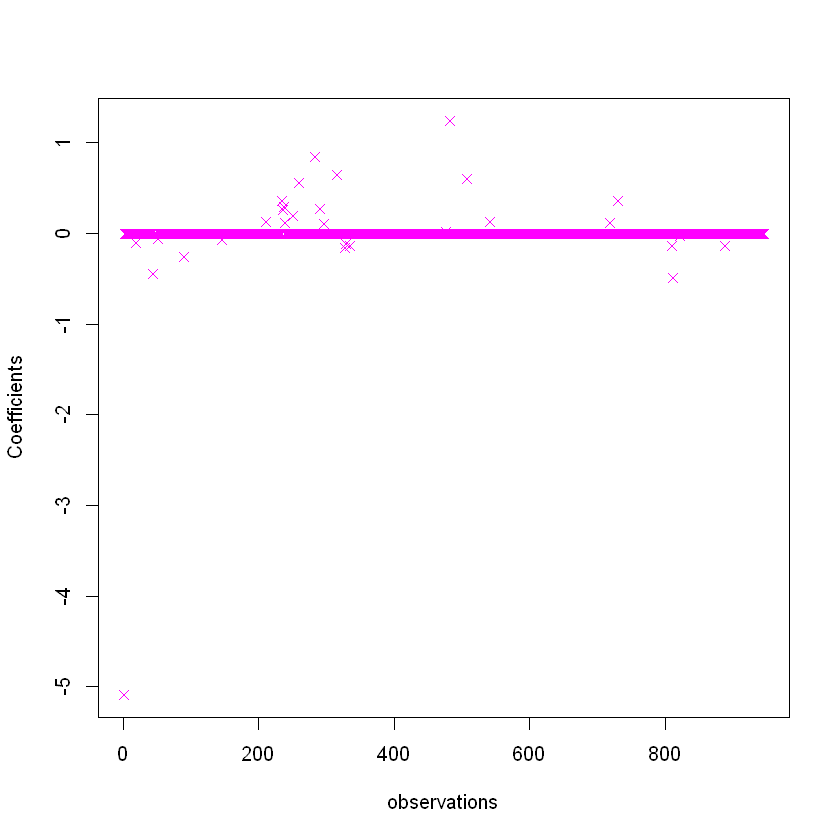

In [44]:
# Representation of coefficients of lasso penalized LR model
# x and y values
x <- 1:length(coefficients(Log_reg_2))
y <- (coefficients(Log_reg_2))
# Plotting of coeff.
plot(x, y, type = "p", pch = 4, col = "magenta", xlab = "observations", ylab = "Coefficients")

Command for Task2b: Accuracy(0.942) of lasso penalized model is higher than that (0.897) of Logistic regression (LR) model having lambda=0. Furthermore, it can be seen that most of coefficients, that is valued zero, stay along a line in the lasso penalized regression model. It can be also observed from confusion matrix for both LR model (LR1 has 2939 zero valued coeff. but LR2 (lasso) has 3050 zero valued coeff.) Moreover, Gesture of Class3 in HW2 is based on x and y axes, so it explains why x and y make high sense on the model.

c) An alternative way to represent the feature matrix on a new space to introduce nonlinear relations is to use distance matrix as a feature matrix. Recall that multidimensional scaling also works on distance matrices and we have mentioned that it can handle nonlinear relations. Use of Euclidean distance as input to a learning algorithm allows for handling nonlinear relations. Given this information, you are expected to transform your training data to distance information (i.e. N by N matrix). Note that you need to perform a similar transformation to your test data. In other words, you need to calculate the distance of each test instance to training instance to obtain a distance based representation for your test data. This will be an Ntest by N matrix (Ntest refers to the number of test instances) where each entry (i,j) refers to the distance of test time series i to the training time series j. You can use Euclidean distance as your distance measure. Perform the same training and test strategy as in part b but use the distances as your new feature matrices. Comment on the regression coefficients. What do they imply under this new representation setting?

In [ ]:
##### Task2 c and d part was not run due to package update problem, I could just write codes.#####

# Distance transformation for train and test data
# Train part
tr_d <- Distance_for_KNN_test(train_data_c, train_data_c)
# Test part
te_d <- Distance_for_KNN_test(test_data_c, train_data_c)
# LR calculation step
set.seed(12) # selected value
nf <- 10 # 10-fold for cv
cross_validation_outputs_d <- cv.glmnet(as.matrix(tr_d), train_data$class, nfolds = nf, family = 'binomial')
Log_reg_d <- glmnet(tr_d, train_data$class, family = 'binomial', weights = NULL, offset = NULL, lambda = cross_validation_outputs_d$lambda.min)
Pred_d <-as.numeric(predict.glmnet(Log_reg_d, as.matrix(te_d)) >= threshold)

In [ ]:
# Confusion matrix
True_1 <- test_data$class
table(Pred_d, True_1)

In [ ]:
# Accuracy of the predictions
mean(Pred_d == True_1)

d) Provide an overall comparison on the results you obtain for each part (over all tasks). You can compare test accuracy of each alternative method you developed.

Commend for overall results:

If we compare the results in terms of accuracy values, knn by manhattan distance model has the highest accuracy value(0.9564) and knn by euclidean distance model (0.9443), LR by lasso penalty (0.9427) and then LR without penalty (0.8972). Models with knn (euclidean and manhattan distance) give the better performance rather than lasso and no penalized Logistic Regression (LR) models, because our UVwavegesturelibrary is non-linear and knn models can work well according to penalized or not penalized LR. Whereas knn models have the highest performance, no penalized LR model has the worst results and lasso penalized LR model give improved results than that of no penalized LR.